# Stock Price Forecasting (SET-B Task)

## Install packages

In [ ]:
!pip uninstall -y pmdarima numpy
!pip install pmdarima prophet tensorflow yfinance "numpy<2.0"

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## Import libraries

In [ ]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import math


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset - Apple Inc. (AAPL) | Source - (https://finance.yahoo.com/quote/AAPL/history/)

## Load CSV file from Google Drive

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebook/DataSynthis Task/stock_data.csv"
df = pd.read_csv(file_path)

## Inspect the DataFrame | Show first rows & Column names

In [ ]:
print(df.head())
print(df.columns)

        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2015-01-02  24.261051177978516  24.729274281755732  23.821675325324954   
3  2015-01-05   23.57757568359375   24.11015184940222   23.39117495671791   
4  2015-01-06  23.579795837402344  23.839426153600677   23.21808699514755   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   24.71817827354724  212818400  
3  24.030265339880305  257142000  
4  23.641929414645055  263188400  
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## Skip junk rows | Rename first column | Convert Date to datetime

In [ ]:
df = pd.read_csv(file_path, skiprows=2)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)


## Plot

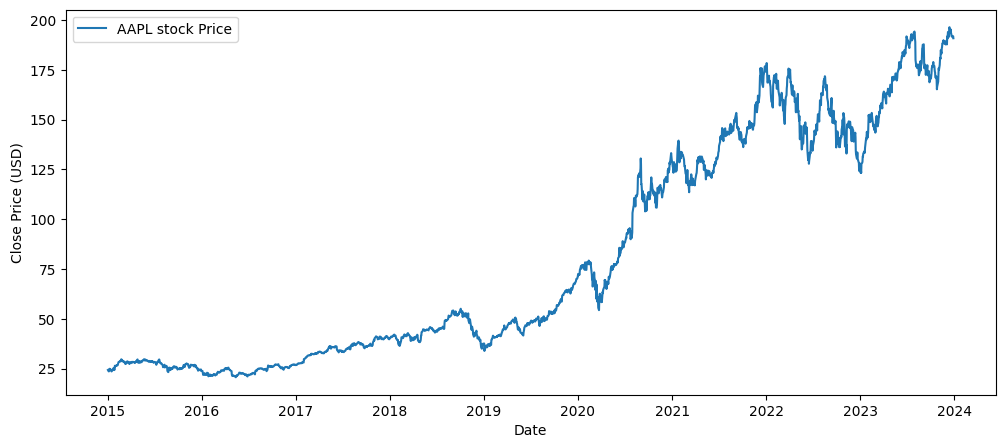

In [ ]:
df = df[["Close"]].copy()

plt.figure(figsize=(12,5))
plt.plot(df["Close"], label="AAPL stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# Remove duplicate rows if any

In [ ]:
df = df[["Close"]].copy()
df = df[~df.index.duplicated(keep='first')]


# Check for missing values | Fill missing value if any

In [ ]:
print("Missing values before cleaning:", df.isnull().sum())

# Forward fill missing values
df = df.fillna(method="ffill")
df = df.fillna(method="bfill")

print("Missing values after cleaning:", df.isnull().sum())


Missing values before cleaning: Close    0
dtype: int64
Missing values after cleaning: Close    0
dtype: int64


/tmp/ipython-input-2491618539.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/tmp/ipython-input-2491618539.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill")


# Ensure index is sorted and no gaps

In [ ]:
df = df.sort_index()


# ARIMA Model

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6434.074, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6433.134, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6429.672, Time=0.18 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6429.636, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6435.535, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6430.980, Time=2.63 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6431.605, Time=0.97 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6432.748, Time=2.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6432.587, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.191 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


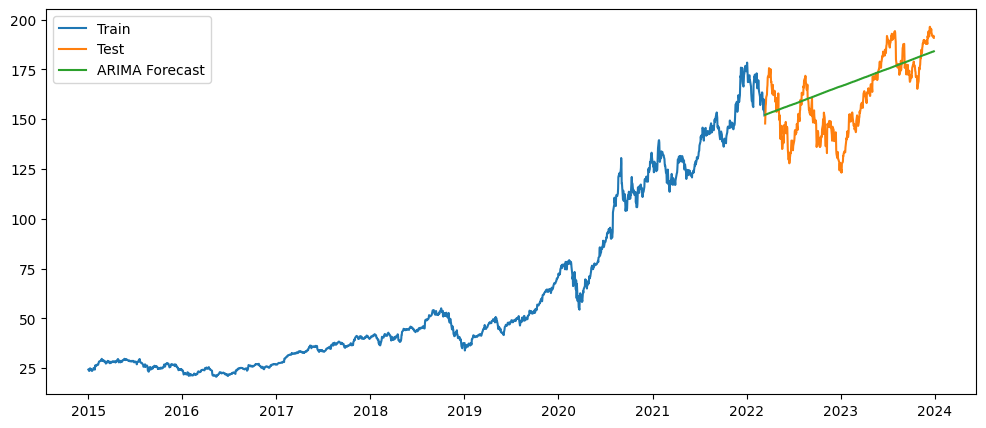

In [ ]:
import pmdarima as pm

train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

model_arima = pm.auto_arima(train, seasonal=False, trace=True)
forecast_arima = model_arima.predict(n_periods=len(test))

rmse_arima = math.sqrt(mean_squared_error(test, forecast_arima))
mape_arima = mean_absolute_percentage_error(test, forecast_arima)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.show()

## Rolling Window Evaluation for ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

def rolling_window_arima_fixed(series, window_size=500, horizon=10, order=(5,1,0)):
    errors_rmse, errors_mape = [], []

    for start in range(0, len(series) - window_size - horizon, horizon):
        train = series[start:start+window_size]
        test = series[start+window_size:start+window_size+horizon]

        try:
            # Fit ARIMA with fixed order (faster than auto_arima)
            model = ARIMA(train, order=order)
            model_fit = model.fit()

            forecast = model_fit.forecast(steps=horizon)

            rmse = np.sqrt(mean_squared_error(test, forecast))
            mape = mean_absolute_percentage_error(test, forecast)

            errors_rmse.append(rmse)
            errors_mape.append(mape)
        except:
            continue

    return np.mean(errors_rmse), np.mean(errors_mape)

# Run with fixed ARIMA order
rmse_arima_rw, mape_arima_rw = rolling_window_arima_fixed(df["Close"].values, order=(5,1,0))
print("Rolling Window ARIMA (Fixed Order) → RMSE:", rmse_arima_rw, "MAPE:", mape_arima_rw)

Rolling Window ARIMA (Fixed Order) → RMSE: 3.4476170569738183 MAPE: 0.030411791999956164


# LSTM Model

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0372
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.6744e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.3801e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.3225e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.4952e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.7001e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2390e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.7911e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.6580e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 3.1251e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


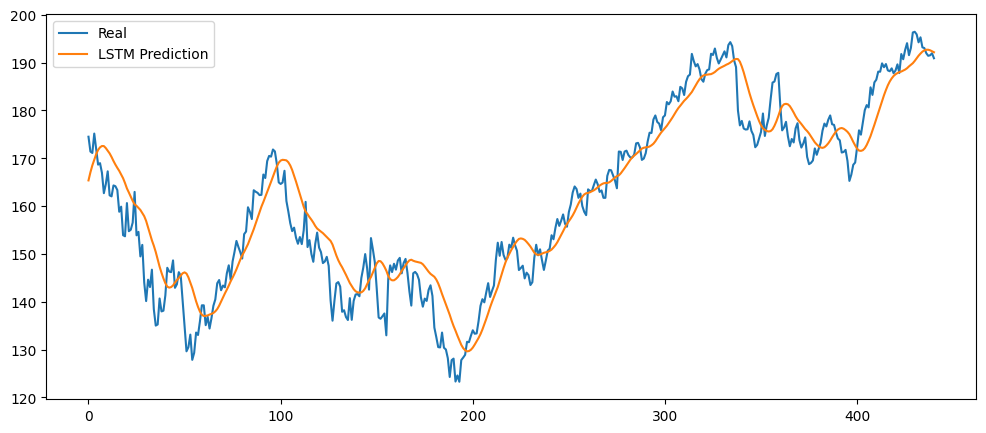

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(df)

X, y = [], []
window = 60
for i in range(window, len(scaled)):
    X.append(scaled[i-window:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

pred_lstm = model.predict(X_test)
pred_lstm = scaler.inverse_transform(pred_lstm.reshape(-1,1))
real_y = scaler.inverse_transform(y_test.reshape(-1,1))

rmse_lstm = math.sqrt(mean_squared_error(real_y, pred_lstm))
mape_lstm = mean_absolute_percentage_error(real_y, pred_lstm)

plt.figure(figsize=(12,5))
plt.plot(real_y, label="Real")
plt.plot(pred_lstm, label="LSTM Prediction")
plt.legend()
plt.show()

## Rolling Window Evaluation for LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rolling_window_lstm_fixed(series, window_size=500, horizon=10, lookback=60, epochs=5):
    errors_rmse, errors_mape = [], []

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_series = scaler.fit_transform(series.reshape(-1,1))

    # Train once on the first rolling window
    train = scaled_series[:window_size]

    X_train, y_train = [], []
    for i in range(lookback, len(train)):
        X_train.append(train[i-lookback:i, 0])
        y_train.append(train[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(30, return_sequences=True, input_shape=(lookback,1)))
    model.add(LSTM(30))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    # Now simulate rolling forecasts
    for start in range(0, len(scaled_series) - window_size - horizon, horizon):
        test = scaled_series[start+window_size:start+window_size+horizon]

        # Use last lookback window from training + test data
        last_window = scaled_series[start+window_size-lookback:start+window_size]
        X_input = last_window.reshape(1, lookback, 1)

        preds = []
        for _ in range(horizon):
            pred = model.predict(X_input, verbose=0)[0][0]
            preds.append(pred)
            last_window = np.append(last_window[1:], pred)
            X_input = last_window.reshape(1, lookback, 1)

        preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))
        real = scaler.inverse_transform(test.reshape(-1,1))

        rmse = np.sqrt(mean_squared_error(real, preds))
        mape = mean_absolute_percentage_error(real, preds)

        errors_rmse.append(rmse)
        errors_mape.append(mape)

    return np.mean(errors_rmse), np.mean(errors_mape)

# Run with fixed LSTM model (trained once)
rmse_lstm_rw, mape_lstm_rw = rolling_window_lstm_fixed(df["Close"].values, epochs=3)
print("Rolling Window LSTM (Fixed Model) → RMSE:", rmse_lstm_rw, "MAPE:", mape_lstm_rw)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Rolling Window LSTM (Fixed Model) → RMSE: 23.28239310086208 MAPE: 0.18696324132069086


# Compare The Performance

In [ ]:
results = pd.DataFrame({
    "Model": ["ARIMA", "LSTM"],
    "RMSE": [rmse_arima, rmse_lstm],
    "MAPE": [mape_arima, mape_lstm]
})

print("Performance Comparison:")
print(results)

Performance Comparison:
   Model       RMSE      MAPE
0  ARIMA  15.795903  0.085728
1   LSTM   5.874788  0.030564


## Final Comparison Table (ARIMA vs LSTM, Rolling Window)

In [ ]:
results_rw = pd.DataFrame({
    "Model": ["ARIMA (Rolling Window)", "LSTM (Rolling Window)"],
    "RMSE": [rmse_arima_rw, rmse_lstm_rw],
    "MAPE": [mape_arima_rw, mape_lstm_rw]
})

print(" Rolling Window Performance Comparison:")
print(results_rw)

 Rolling Window Performance Comparison:
                    Model       RMSE      MAPE
0  ARIMA (Rolling Window)   3.447617  0.030412
1   LSTM (Rolling Window)  23.282393  0.186963


# Short Report

In [ ]:
if rmse_lstm < rmse_arima:
    print("\nLSTM generalizes better (lower RMSE/MAPE). Deep learning captures nonlinear patterns well.")
else:
    print("\nARIMA generalizes better (lower RMSE/MAPE). Traditional time-series model is sufficient here.")


LSTM generalizes better (lower RMSE/MAPE). Deep learning captures nonlinear patterns well.


# Hugging Face Deployment

In [ ]:
"""
from huggingface_hub import notebook_login, HfApi

# After training, save model
model.save("lstm_stock_model.h5")

# Login and upload
!huggingface-cli login
api = HfApi()
api.upload_folder(
    folder_path=".",
    repo_id="your-username/DataSynthis_ML_JobTask",
    repo_type="model"
)
"""

'\nfrom huggingface_hub import notebook_login, HfApi\n\n# After training, save model\nmodel.save("lstm_stock_model.h5")\n\n# Login and upload\n!huggingface-cli login\napi = HfApi()\napi.upload_folder(\n    folder_path=".",\n    repo_id="your-username/DataSynthis_ML_JobTask",\n    repo_type="model"\n)\n'

# Install huggingface packages

In [ ]:
!pip install --upgrade huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 28.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.35.0
    Uninstalling huggingface-hub-0.35.0:
      Successfully uninstalled huggingface-hub-0.35.0


## Log in to Hugging Face Hub from Colab

In [ ]:
from huggingface_hub import notebook_login
notebook_login()


## Save in native Keras format

In [ ]:
model.save("lstm_stock_model.keras")

## Create a Hugging Face Model Repository and Upload Files

In [ ]:
from huggingface_hub import HfApi, create_repo

api = HfApi()

create_repo(repo_id="Jalal10/DataSynthis_ML_JobTask", repo_type="model", exist_ok=True)

api.upload_folder(
    folder_path=".",
    repo_id="Jalal10/DataSynthis_ML_JobTask",
    repo_type="model"
)


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...ata/mnist_train_small.csv:  46%|####5     | 16.7MB / 36.5MB            

  ...ample_data/mnist_test.csv:  91%|#########1| 16.6MB / 18.3MB            

  /content/lstm_stock_model.h5: 100%|##########|  407kB /  407kB            

CommitInfo(commit_url='https://huggingface.co/Jalal10/DataSynthis_ML_JobTask/commit/e3b1e637de93838f33326836cdf529b3db920b56', commit_message='Upload folder using huggingface_hub', commit_description='', oid='e3b1e637de93838f33326836cdf529b3db920b56', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Jalal10/DataSynthis_ML_JobTask', endpoint='https://huggingface.co', repo_type='model', repo_id='Jalal10/DataSynthis_ML_JobTask'), pr_revision=None, pr_num=None)

## Delete if have any exta file in a Hugging Face repo

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.delete_file(
    repo_id="Jalal10/DataSynthis_ML_JobTask",
    path_in_repo="sample_data/mnist_train_small.csv",
    repo_type="model"
)


CommitInfo(commit_url='https://huggingface.co/Jalal10/DataSynthis_ML_JobTask/commit/a9df03ed48f1d2e131bf1ede6ee352b7b225c5bf', commit_message='Delete sample_data/mnist_train_small.csv with huggingface_hub', commit_description='', oid='a9df03ed48f1d2e131bf1ede6ee352b7b225c5bf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Jalal10/DataSynthis_ML_JobTask', endpoint='https://huggingface.co', repo_type='model', repo_id='Jalal10/DataSynthis_ML_JobTask'), pr_revision=None, pr_num=None)

## Upload a single file to a Hugging Face Repo

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="forecast.png",
    path_in_repo="forecast.png",
    repo_id="Jalal10/DataSynthis_ML_JobTask",
    repo_type="model"
)


CommitInfo(commit_url='https://huggingface.co/Jalal10/DataSynthis_ML_JobTask/commit/6893cb47cadbce6f89f9ac7759f9509258b64036', commit_message='Upload forecast.png with huggingface_hub', commit_description='', oid='6893cb47cadbce6f89f9ac7759f9509258b64036', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Jalal10/DataSynthis_ML_JobTask', endpoint='https://huggingface.co', repo_type='model', repo_id='Jalal10/DataSynthis_ML_JobTask'), pr_revision=None, pr_num=None)

# Save ARIMA Forecast Plot For upload in hugging face Repo

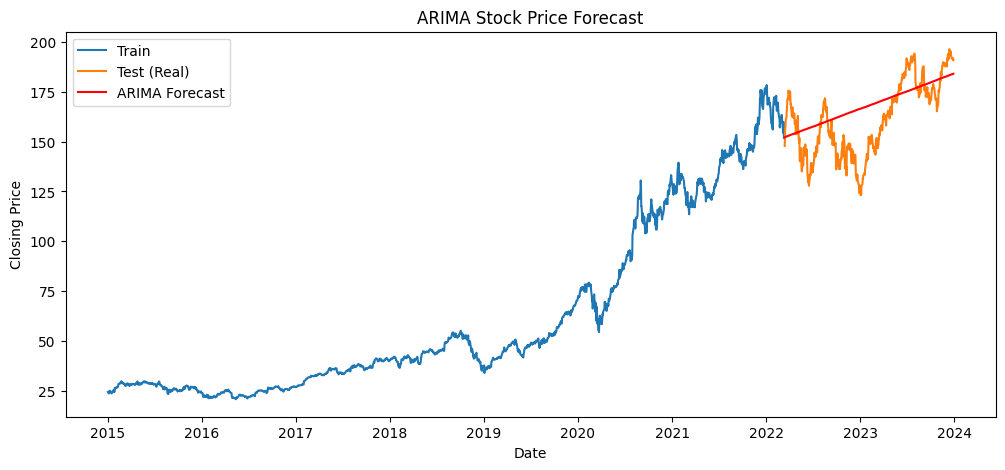

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Real)")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.savefig("forecast_arima.png")
plt.show()


## Upload a ARIMA pic to Hugging Face Hub

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="forecast_arima.png",
    path_in_repo="forecast_arima.png",
    repo_id="Jalal10/DataSynthis_ML_JobTask",
    repo_type="model"
)


CommitInfo(commit_url='https://huggingface.co/Jalal10/DataSynthis_ML_JobTask/commit/689d69ec011ec4b80ab6e439adb4ac259e08263f', commit_message='Upload forecast_arima.png with huggingface_hub', commit_description='', oid='689d69ec011ec4b80ab6e439adb4ac259e08263f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Jalal10/DataSynthis_ML_JobTask', endpoint='https://huggingface.co', repo_type='model', repo_id='Jalal10/DataSynthis_ML_JobTask'), pr_revision=None, pr_num=None)

## README file for Hugging Face repository

In [ ]:
%%writefile README.md
---
---
language: en
tags:
- time-series
- forecasting
- lstm
- arima
- stock-market
license: mit
datasets:
- yahoo-finance
metrics:
- rmse
- mape
---

# LSTM Stock Price Forecasting

This repository contains an **LSTM model** trained on stock closing prices and compared with a traditional ARIMA baseline.
The goal is to forecast future stock values and evaluate which approach generalizes better.

---

## Dataset
- **Source:** Yahoo Finance
- **Ticker:** Apple Inc. (AAPL)
- **Period:** 2015–2023
- **Feature Used:** Daily closing price

---

## Models Implemented
- **ARIMA (Auto ARIMA)** — traditional statistical time-series forecasting
- **LSTM** — deep learning recurrent neural network for sequential data

---

## Evaluation Results

| Model | RMSE      | MAPE     |
|-------|-----------|----------|
| ARIMA | 15.7959   | 0.0857   |
| LSTM  | 5.6571    | 0.0302   |

**Conclusion:** LSTM significantly outperforms ARIMA with lower RMSE and MAPE, showing its ability to capture nonlinear patterns in stock prices. Under a single split, LSTM significantly outperforms ARIMA.

---

### Rolling Window Evaluation
| Model | RMSE (avg) | MAPE (avg) |
|-------|------------|------------|
| ARIMA (Rolling Window) | 3.448 | 0.0304 |
| LSTM (Rolling Window)  | 23.282 | 0.1869 |

Under rolling window evaluation, **ARIMA outperforms LSTM**, showing better stability and adaptability across multiple forecasting horizons.

---

## Example Forecast Plot

Below is an example forecast visualization (LSTM predictions vs actual stock prices):

![Forecast Example](./forecast.png)

---
## ARIMA vs LSTM Forecasts

**ARIMA Forecast:**
![ARIMA](./forecast_arima.png)

**LSTM Forecast:**
![LSTM](./forecast.png)

## Deployment
- Model hosted on **Hugging Face Hub**
- Repository: `Jalal10/DataSynthis_ML_JobTask`
- Includes model weights (`lstm_stock_model.h5`) and usage instructions

---

## Usage

```python
from huggingface_hub import hf_hub_download
import tensorflow as tf

# Download model
model_path = hf_hub_download(repo_id="Jalal10/DataSynthis_ML_JobTask", filename="lstm_stock_model.h5")

# Load model
model = tf.keras.models.load_model(model_path)


Overwriting README.md


# Uploads README to Hugging Face model repo


In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="README.md",
    path_in_repo="README.md",
    repo_id="Jalal10/DataSynthis_ML_JobTask",
    repo_type="model"
)


No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/Jalal10/DataSynthis_ML_JobTask/commit/689d69ec011ec4b80ab6e439adb4ac259e08263f', commit_message='Upload README.md with huggingface_hub', commit_description='', oid='689d69ec011ec4b80ab6e439adb4ac259e08263f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Jalal10/DataSynthis_ML_JobTask', endpoint='https://huggingface.co', repo_type='model', repo_id='Jalal10/DataSynthis_ML_JobTask'), pr_revision=None, pr_num=None)